            0           1             2
0    1.000000  500.000000    500.000000
1    0.993688  500.448758    505.794582
2    0.987453  500.893508    511.502201
3    0.981293  501.334316    517.123664
4    0.975208  501.771243    522.659720
..        ...         ...           ...
995  0.000059  929.954562 -61064.111629
996  0.000059  929.954544 -61141.946863
997  0.000059  929.954526 -61219.782093
998  0.000059  929.954508 -61297.617320
999  0.000059  929.954491 -61375.452544

[1000 rows x 3 columns]


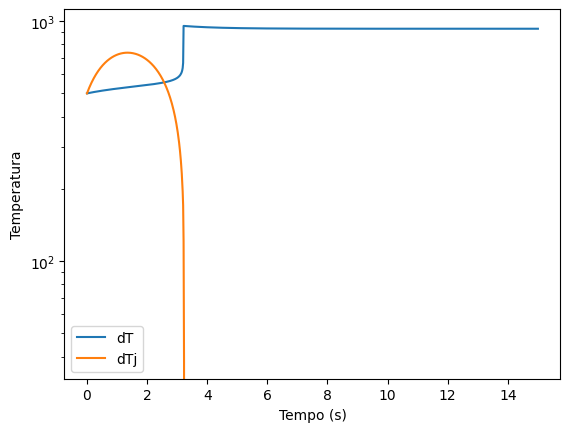

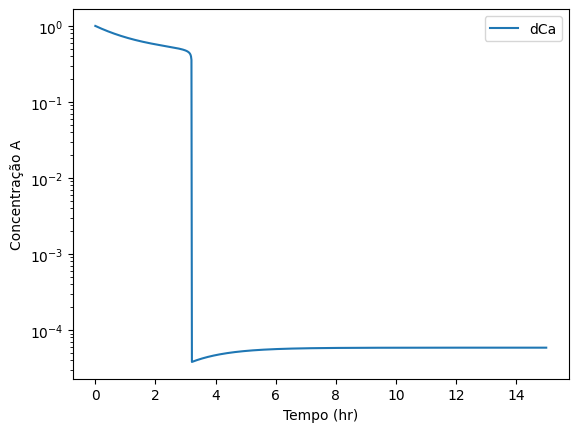

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import exp

    # VARIAVEIS DO REATOR

CAo    = 0.5    # Concentração do fluido A na entrada;
rho    = 50.0    # Densidade do fluido A;
_u      = 150.0    # Energia;
_a      = 250.0    # Área do reator;
_v      = 48.0    # Volume interno do Reator;
Fi     = 40.0    # Fluxo na saída do reator;
Fo     = 40.0    # Fluxo na entrada do reator;
To     = 530.0
lbd     = -3e4 

    # VARIAVEIS DA CAMISA

Fj     = 49.9    # Fluxo da camisa;
Vj     = 3.85    # Volume da camisa;
Cj     = 1.0       # Concentração do fluido refrigerante
Cp     = 0.75
rhoj   = 62.3    # Densidade do fluido refrigerante;
Toj    = 530.0

# Cálculo da taxa de reação de Arrhenius
def k(T):
    E       = 3e4        # activation energy J/gmol
    R       = 1.99      # gas constant J/gmol/K
    k0      = 7.8e10    # Arrhenius rate constant 1/min
    return k0 * np.exp(-E/R/T)

def odes(x,t):

    Ca  = x[0] # Concentração interna do reator;
    Tj  = x[1] # Temperatura interna jaqueta;
    T   = x[1] # Temperatura interna do reator;

    # if T < 800:
    #     ko = k(T)
    # else:
    #     ko = 0.1
    ko = k(T)

    dCadt  = (Fo/_v) * (CAo - Ca) - (ko * Ca)
    dTdt   = (Fo/_v) * (To - T) - (Ca * lbd * ko)/(rho * Cp) - (_u * _a) * (T - Tj)/(rho * Cp * _v)
    dTjdt  = (Fj/Vj) * (Toj - Tj) + (_u * _a) * (T - Tj)/(rhoj * Cj * Vj)

    return dCadt, dTdt, dTjdt


x0 = [1,500, 500]
t = np.linspace(0,15,1000)
x = odeint(odes, x0, t)
# x, infodict = odeint(odes, x0, t, full_output = True)

data = pd.DataFrame(x)
print(data)


A = x[:,0]
B = x[:,1]
C = x[:,2]

# print(f"o valor de A ==> {A}")
# print(f"o valor de B ==> {B}")
# print(f"o valor de C ==> {C}")

plt.semilogy(t,B,label='dT')
plt.semilogy(t,C,label='dTj')
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Temperatura")
plt.show()

plt.semilogy(t,A,label='dCa')
plt.legend()
plt.xlabel("Tempo (hr)")
plt.ylabel("Concentração A")
plt.show()
plt.show()
